<a href="https://colab.research.google.com/github/nathan-young1/Decision_Trees_Mini_Tutorial_GDG/blob/main/Decision_Trees_GDG_Tutorial_Public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Downloads the dataset from kaggle.
diabetes_path = kagglehub.dataset_download('uciml/pima-indians-diabetes-database')

print('Data source import complete.')

100%|██████████| 8.91k/8.91k [00:00<00:00, 13.4MB/s]

Extracting files...
Data source import complete.


- **About Dataset**

    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# This will read the CSV (comma seperated values) diabetes file in a pandas Dataframe think of it as like a excel spreedsheet organized
# for easy data manipulation.
diabetes_ds = pd.read_csv(diabetes_path + "/diabetes.csv")

diabetes_ds.head() # sneek peak at what the dataset looks like.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_ds.info() # Check the datatype of each column & if any values are null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from sklearn.model_selection import train_test_split

# Before we even start exploring the data, we have to split first so any insight & decision we make is unbiased.. cos snooping will
# contaminated your test set making it a non-accurate incidator of the models generalization.
dia_train, dia_test = train_test_split(diabetes_ds, test_size=0.2, random_state=42)

# Now split the train set into two : training and validation (used to make decision on model settings.)
dia_train, dia_val = train_test_split(dia_train, test_size=0.2, random_state=42)

# Note: random_state=42 (or any other number) is so we get the same splits when we rerun this code, without it the 80/20 splits are random
# everytime.

### Exploring Our Data

DataFrame.describe() method generates descriptive statistics that summarize important details about our dataset. One important thing is that the describe() method deals only with numeric value columns. It doesn't work with any categorical values (e.g text), they are ignored.

In [5]:
dia_train.describe().T  # Note : The .T is just meant to rotate the table for better view.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,491.0,3.769857,3.346333,0.000,1.0000,3.000,6.000,17.000
Glucose,491.0,120.680244,32.567819,0.000,99.5000,117.000,139.000,198.000
BloodPressure,491.0,69.676171,18.357755,0.000,64.0000,72.000,80.000,110.000
SkinThickness,491.0,20.317719,15.264233,0.000,0.0000,23.000,32.000,60.000
Insulin,491.0,83.370672,119.867363,0.000,0.0000,44.000,130.000,846.000
BMI,491.0,32.300815,7.479875,0.000,27.3500,32.400,36.600,67.100
DiabetesPedigreeFunction,491.0,0.453006,0.311255,0.084,0.2405,0.356,0.596,2.329
Age,491.0,33.071283,11.375278,21.000,24.0000,29.000,41.000,81.000
Outcome,491.0,0.348269,0.476908,0.000,0.0000,0.000,1.000,1.000


##### Note : BMI (Body Mass Index) is used to categorize people based on their weight relative to their height. e.g overweight, underweight, normal...

There are five basic ranges within the BMI scale:

- Underweight = less than 18.5;
- Normal weight = 18.5-24.9;
- Overweight = 25-29.9;
- Obesity = 30-35;
- Severe obesity = 35 and over.

#### Alert ⚠️: (Something is weird)
Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

It is better to replace zeros with nan (which means null) since after that counting them would be easier and zeros need to be replaced with suitable values.

In [6]:
import numpy as np # for mathematical functions.

# Note: The double [[]] is just a shortcut by pandas so that result are 2D arrays.
dia_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dia_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
# lets view the dataset info now we have replaced those wrong 0's with Nan.
dia_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 140 to 393
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               491 non-null    int64  
 1   Glucose                   486 non-null    float64
 2   BloodPressure             472 non-null    float64
 3   SkinThickness             351 non-null    float64
 4   Insulin                   260 non-null    float64
 5   BMI                       487 non-null    float64
 6   DiabetesPedigreeFunction  491 non-null    float64
 7   Age                       491 non-null    int64  
 8   Outcome                   491 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 38.4 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

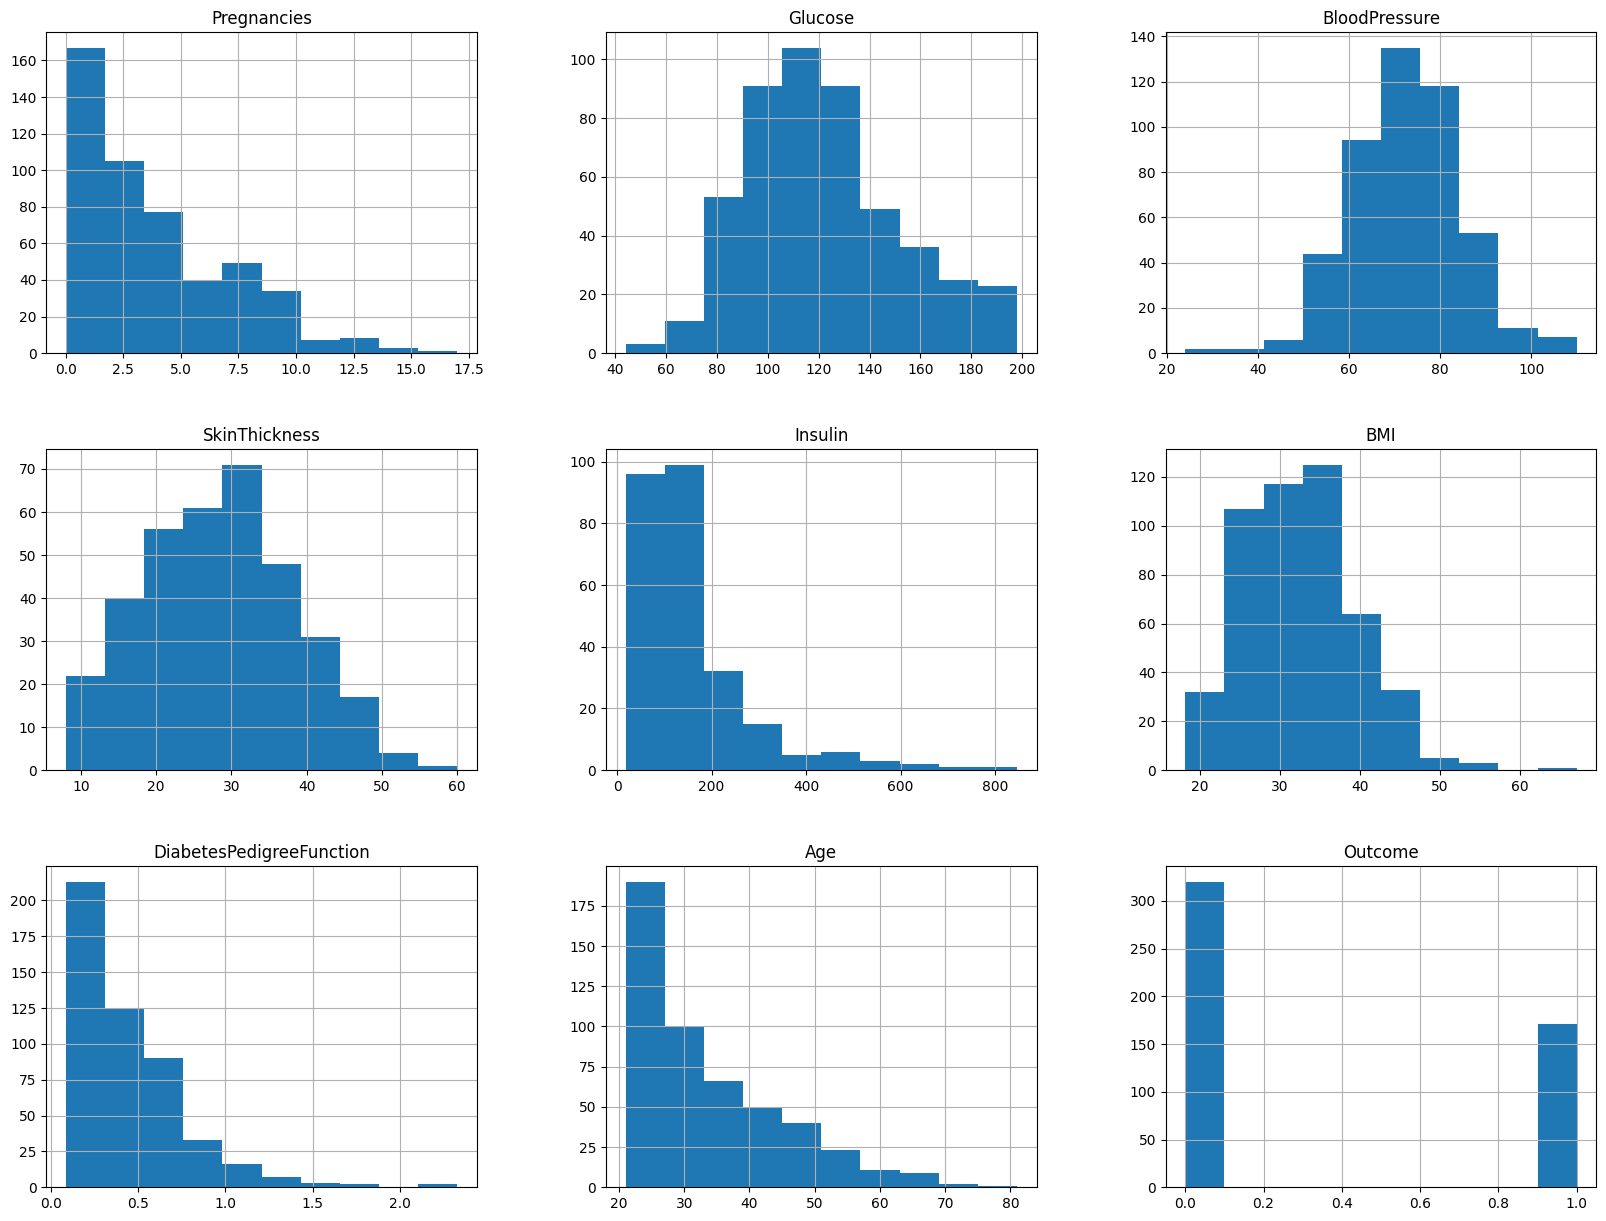

In [8]:
# Before we fill in the Nan (null values), let's visualize our data.
dia_train.hist(figsize=(20, 15))
# This will plot a histogram of the numerical columns, in this case is the number of people (y-axis) that have a certain value on the (x-axis).

In [9]:
# There are many interesting ways of getting a value to fill the null spots e.g Mode (most frequent), Mean (average), Median, perform
# more analysis and find similar rows and fill from there ... e.t.c

# We will use one of the easiest method, just fill with the mean (average).
# But first we need to reailize that just like our train set, our test set and real life might also have those columns as 0 or nan, so for
# now lets save the mean(average) so we can use it on the val, test and real life when we need to replace their nan.

# Note : it is common to in real life to get estimates like this from the training data that you keep for future use.

GLUCOSE_MEAN = dia_train['Glucose'].mean()
BP_MEAN = dia_train['BloodPressure'].mean()
SKIN_THICKNESS_MEAN = dia_train['SkinThickness'].mean()
INSULIN_MEAN = dia_train['Insulin'].mean()
BMI_MEAN = dia_train['BMI'].mean()

# since we will need to fill other datasets, lets make this into a function.
def fill_sus_columns(dataset_to_fill):
    '''Will fill the NAN of sus columns like Glucose, BloodPressure, SkinThickness, Insulin, BMI .. with mean (average) learnt from training set.'''
    dataset_to_fill['Glucose'] = dataset_to_fill['Glucose'].fillna(GLUCOSE_MEAN)
    dataset_to_fill['BloodPressure'] = dataset_to_fill['BloodPressure'].fillna(BP_MEAN)
    dataset_to_fill['SkinThickness'] = dataset_to_fill['SkinThickness'].fillna(SKIN_THICKNESS_MEAN)
    dataset_to_fill['Insulin'] = dataset_to_fill['Insulin'].fillna(INSULIN_MEAN)
    dataset_to_fill['BMI'] = dataset_to_fill['BMI'].fillna(BMI_MEAN)

In [10]:
# Now let's call the filling method on our train dataset.
fill_sus_columns(dia_train)

In [11]:
# let's call describe again to look at those columns
dia_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,491.0,3.769857,3.346333,0.000,1.0000,3.000000,6.000000,17.000
Glucose,491.0,121.921811,30.174899,44.000,100.0000,118.000000,139.000000,198.000
BloodPressure,491.0,72.480932,11.882059,24.000,64.5000,72.480932,80.000000,110.000
SkinThickness,491.0,28.421652,8.246656,8.000,24.0000,28.421652,32.000000,60.000
Insulin,491.0,157.442308,90.444347,18.000,119.5000,157.442308,157.442308,846.000
BMI,491.0,32.566119,6.881969,18.200,27.4500,32.500000,36.600000,67.100
DiabetesPedigreeFunction,491.0,0.453006,0.311255,0.084,0.2405,0.356000,0.596000,2.329
Age,491.0,33.071283,11.375278,21.000,24.0000,29.000000,41.000000,81.000
Outcome,491.0,0.348269,0.476908,0.000,0.0000,0.000000,1.000000,1.000


### Decision Trees

Lets say you are trying to decide whether to cook in the hostel or go out to eat. There are several factors you might consider before making a decision, such as:

Do i have food stuffs?
Do i have time to cook?
Am i too tired?
A decision tree is a way to break this decision-making process down into a series of questions that lead you to a final decision, just like you do when you’re deciding on food!

<img src="https://1drv.ms/i/c/0393b431e124644c/IQSzOnUxOdUPRpsS6MyWszrfAVk47zlB43aLo4kUv0rFJME?width=800" width="800" height="auto" />

This is exactly how decision trees work in AI and machine learning. They ask a series of “yes” or “no” questions (called nodes), eventually reaching a decision (called leaves).


#### How Does It Work in AI?
- A decision tree helps computers make decisions based on the data you give it.
- It splits data into smaller parts by asking questions like: Is this number greater than 5? or Is this feature present?
- Each question helps narrow down the possibilities until the computer can make a final decision, like classifying data (e.g., "Will a student pass or fail?" based on their study habits) or predicting a value (e.g., predicting the price of a house).

### Why Use a Decision Tree?
- Simple and easy to understand: Decision trees mimic how humans make decisions.
- Interpretable: You can see exactly how the model arrived at a decision, unlike some "black-box" models.
- Works with different data types: Whether your data has numbers (like age) or categories (like favorite food), a decision tree can handle it.

In [12]:
# seperate the answers from the data, as we are trying to predict the answers.
X_dia_train, y_dia_train = dia_train.drop(["Outcome"], axis=1), dia_train["Outcome"]

X_dia_val, y_dia_val = dia_val.drop(["Outcome"], axis=1), dia_val["Outcome"]

X_dia_test, y_dia_test = dia_test.drop(["Outcome"], axis=1), dia_test["Outcome"]

In [13]:
from sklearn.tree import DecisionTreeClassifier # we will be using scikit-learn to build the decision trees.

### Additional concepts / parameters in decision trees
- Max Depth: This is the length of the longest leaf node to the root node.. we also use it as a parameter to control how deep a tree can grow.  It limits the number of splits in the tree, helping prevent overfitting (when the model learns noise instead of the actual pattern).

    Example: If you set a max depth of 3, your decision tree can only ask three questions before making a final decision. This helps keep the tree simple and interpretable.

- Min Samples Split: This parameter sets the minimum number of samples (data points) required to split an internal node. If there aren’t enough samples, the node won’t be split further.

    In this diabetes dataset, decision trees seperate the data based on questions to decide if they have diabetes .. so this parameters mean at least how many people should we have at a node to ask another split question... note we are trying to reduce overfitting by asking just enough questions to decide if one has diabetes.

    Example: If you set min_samples_split to 10, a question can only be asked if there are at least 10 data points (think 10 people) at that node. This prevents the tree from becoming too complex with very few data points.

- E.t.c: There are so many other parameters but we will focus on this two today.

In [14]:
tree_clf = DecisionTreeClassifier(min_samples_split=35, random_state=42) # creates a decision trees with max five questions.

tree_clf.fit(X_dia_train, y_dia_train) # we call .fit to tell the model train the model on the training data.

DecisionTreeClassifier(min_samples_split=35, random_state=42)

In [15]:
print(f"Training Score: {tree_clf.score(X_dia_train, y_dia_train):.3%}")

Training Score: 86.354%


In [16]:
# oops before we test the validation score lets remember to fill the those suspicious columns, with our method
fill_sus_columns(X_dia_val)
print(f"Validation Score: {tree_clf.score(X_dia_val, y_dia_val):.3%}")

# Remember is the validation dataset we use as an indicator to tune Hyperparmeters (this are model parameters like max depth, min_samples_leaf e.t.c)

# Note: if the training score is much higher than validation it signals overfitting, if training score is low it signals underfitting.
# You can play with parameters and get more insights to improve your validation score, note training score and validation score / test score
# should not be so far apart, if they are it mean you need to investigate further.

# Some simple estimates i tried before, that worked relatively well:
# - min_samples_split in range [30-35] (think we need at least 30 - 35 people in the node to ask further diabetes classifying question).
# - max_depth = 5 think the model is allowed to ask max five questions.
# - A mixture of both.

Validation Score: 79.675%


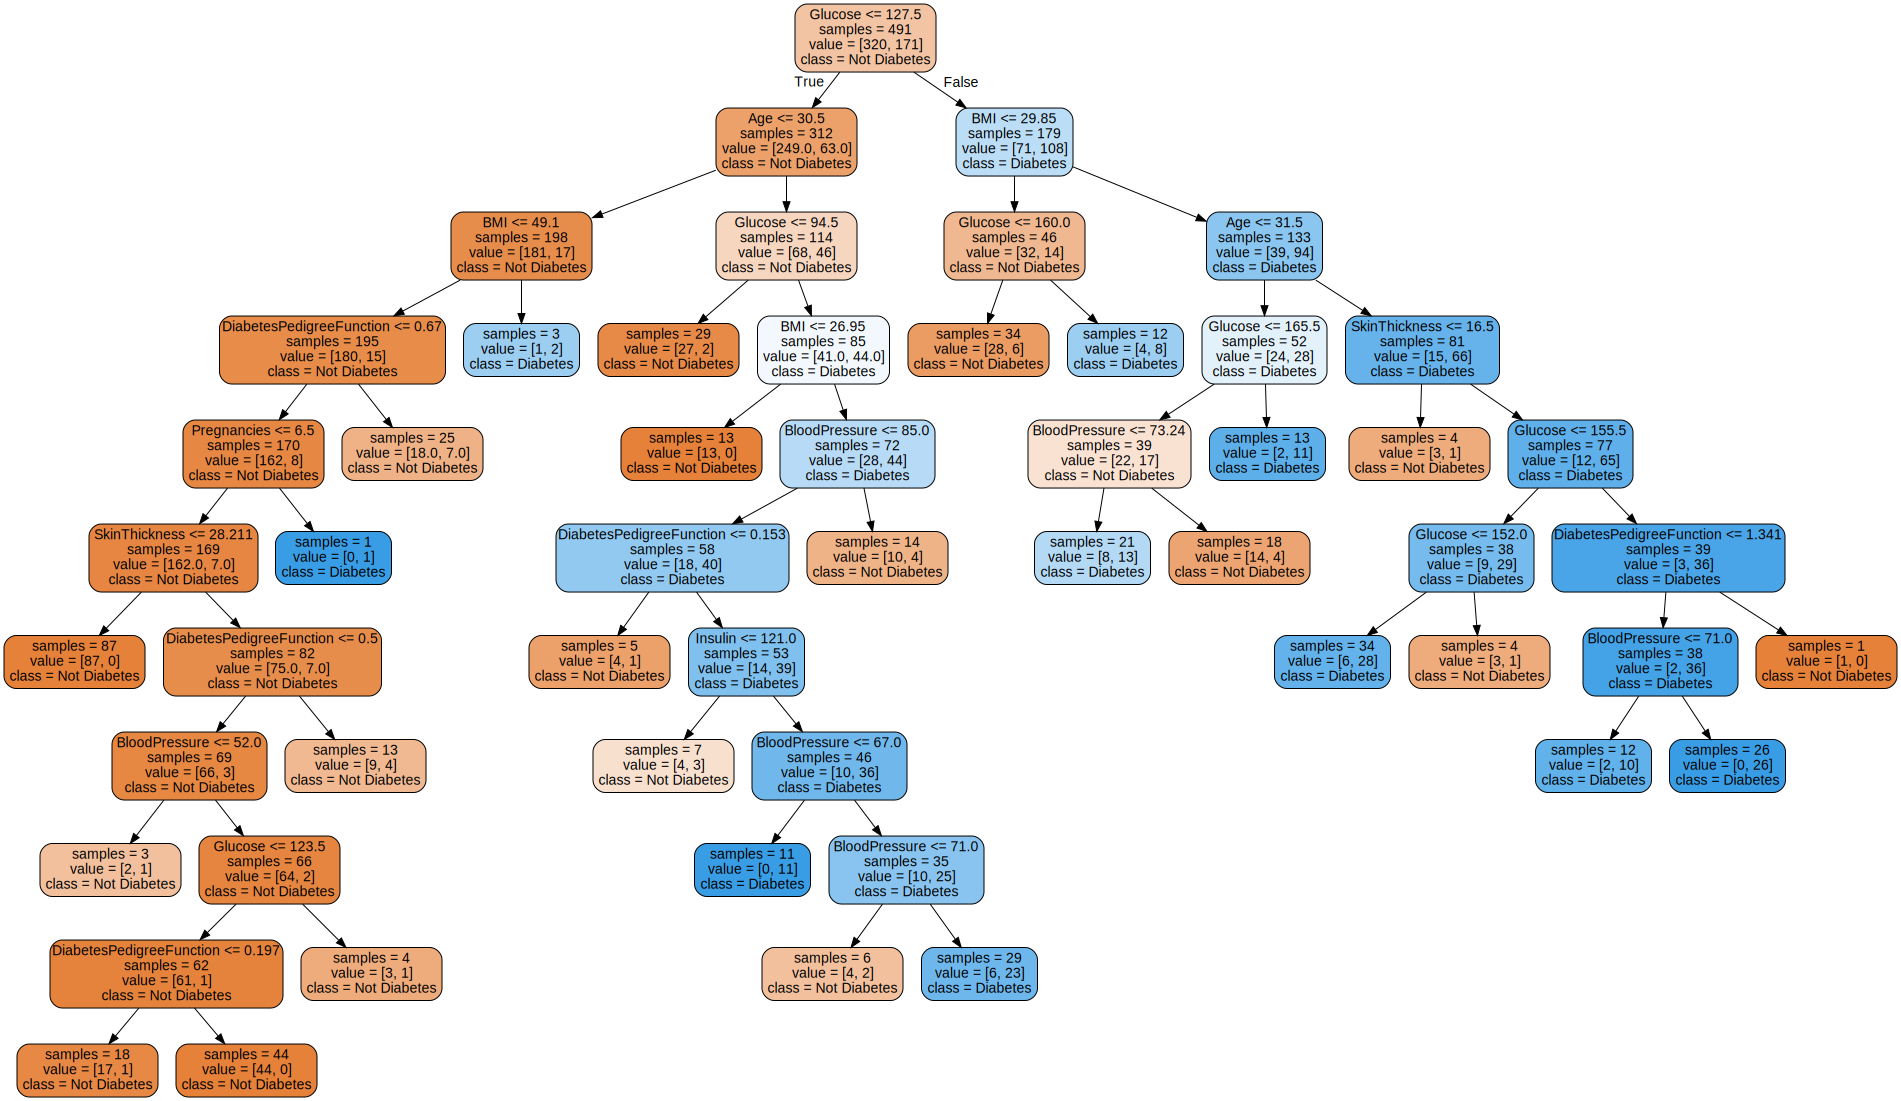

In [17]:
# Lets visualize the tree it built.
from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
out_file="tree.dot",
feature_names=X_dia_train.columns,
class_names=["Not Diabetes", "Diabetes"],
impurity=False,
rounded=True, filled=True)

# To display the saved file
from graphviz import Source

Source.from_file("tree.dot")

In [18]:
# Lets now test generalization after all our tuning parameters.
fill_sus_columns(X_dia_test) # don't forget to fill our sus columns.
print(f"Test Score: {tree_clf.score(X_dia_test, y_dia_test):.3%}")

Test Score: 72.727%


This is a very simplitic model, we can still perform way more better (~86% and above on test & validation set), by more data investigation, parameter tuning e.t.c .

Because of the vast possible comination of hyperparameters we can't keep testing one by one like this there are models in scikit learn for this search purpose: from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearch.

But as we have seen it is important to first understand your data, the problem you are trying to solve and other factors before you jump into training.. Also Domain knowledge give you an very good edge.


# Your Chance to build yours.

Predict species of flower based on leaf features.

- **About the Iris Dataset:**

    The Iris dataset is a classic dataset in machine learning and statistics, introduced by British biologist and statistician Ronald Fisher in 1936. It contains 150 samples of iris flowers, with measurements for four features: sepal length, sepal width, petal length, and petal width. These features are used to classify the flowers into one of three species: Iris setosa (class 0), Iris versicolor (class 1), and Iris virginica (class 2). Due to its simplicity and relatively small size, it is widely used for introductory data analysis and classification tasks.

In [19]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Convert to a Pandas DataFrame for easier analysis
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) column to the DataFrame
iris_df['species'] = iris.target

# Show the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
